In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
df = pd.read_csv("Q2.csv")

In [29]:
df.sample(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9809,5,95,Yes,8,5,82.0
7602,8,67,No,9,9,63.0
8617,1,58,No,5,2,33.0
9608,7,93,No,8,7,87.0
8517,4,53,No,9,5,34.0
9737,6,75,No,4,2,61.0
7158,6,46,No,5,3,34.0
2303,2,60,No,9,0,35.0
114,7,68,No,4,8,56.0
5619,6,60,No,6,6,48.0


In [30]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
5962,3,64,1,4,7,43.0
316,8,43,0,6,4,36.0
1664,6,95,0,6,9,82.0
3099,6,54,1,5,2,41.0
4463,5,88,0,8,8,74.0


In [31]:
print(df.describe())
print(df.info())

       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

        Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  10000.000000                      10000.000000       10000.000000  
mean       6.530600                          4.583300          55.224800  
std        1.695863                          2.867348          19.212558  
min        4.000000                          0.000000          10.000000  
25%

In [32]:
X = df.iloc[:, :-1]
Y = df.iloc[:,-1]

In [33]:
x_train, x_dev_test, y_train, y_dev_test = train_test_split(X, Y, train_size=0.7, random_state=5)
print(x_train.shape)
print(y_train.shape)


x_test, x_dev, y_test, y_dev = train_test_split(x_dev_test, y_dev_test, train_size=(1/3), random_state=5)
print(x_test.shape)
print(y_test.shape)
print(x_dev.shape)
print(y_dev.shape)

(7000, 5)
(7000,)
(1000, 5)
(1000,)
(2000, 5)
(2000,)


In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_dev = sc.transform(x_dev)
x_test

array([[-0.39722698,  1.71872944,  1.00716855, -0.32350284, -1.24566857],
       [-1.17295271, -0.18733933, -0.99288247, -0.32350284,  1.53318017],
       [ 1.15422448, -1.34253253, -0.99288247,  0.85747234,  1.53318017],
       ...,
       [ 0.76636161, -0.59165695, -0.99288247, -1.50447802, -1.59302466],
       [-0.00936412, -1.45805185,  1.00716855,  1.44795992, -1.24566857],
       [-0.39722698, -0.93821491, -0.99288247, -0.32350284,  0.83846798]])

In [35]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_dev, y_dev))

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2868.3174 - val_loss: 100.4436
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 57.0591 - val_loss: 32.2862
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29.4010 - val_loss: 23.9021
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.3164 - val_loss: 18.0195
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.3959 - val_loss: 13.8182
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.8808 - val_loss: 10.7198
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4761 - val_loss: 8.3644
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1458 - val_loss: 6.8634
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6814 - val_loss: 5.6637
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8216 - val_loss: 5.0498
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1164 - val_loss: 4.8633
Epoch 12/100
219/219 ━━━━

**MSE (Mean Squared Error):** This error function calculates the average of the squares of the differences between the actual and predicted values. It is suitable for regression problems and aims to minimize the discrepancy between predictions and actual values.

MSE = Σ(yi − pi)^2 / n

**Adam:** Adam is an optimization algorithm used to update the weights of the network during the training process. It combines the advantages of RMSprop and Stochastic Gradient Descent algorithms and is popular due to its high convergence speed and less need for manual tuning of parameters.


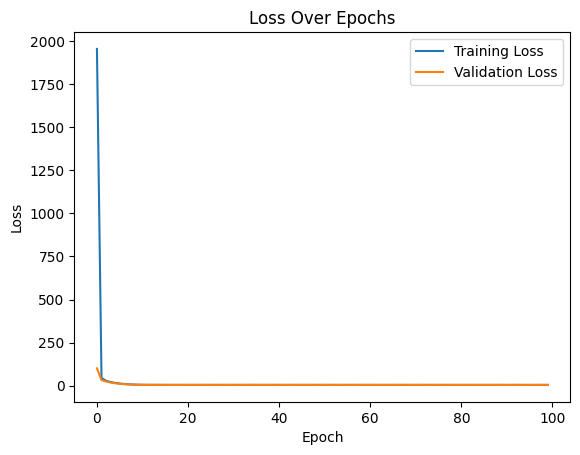

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

It is because initially, the loss is a large number, and after the model learns, it will reduce, making the details more visible.

so you can see that validation loss is much less than training loss because the model is learnd now.

In [38]:
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1343
Test Loss: 4.294422626495361


In [39]:
predictions = model.predict(x_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Absolute Error: 1.6539512987136842
R-squared: 0.9889059762041196


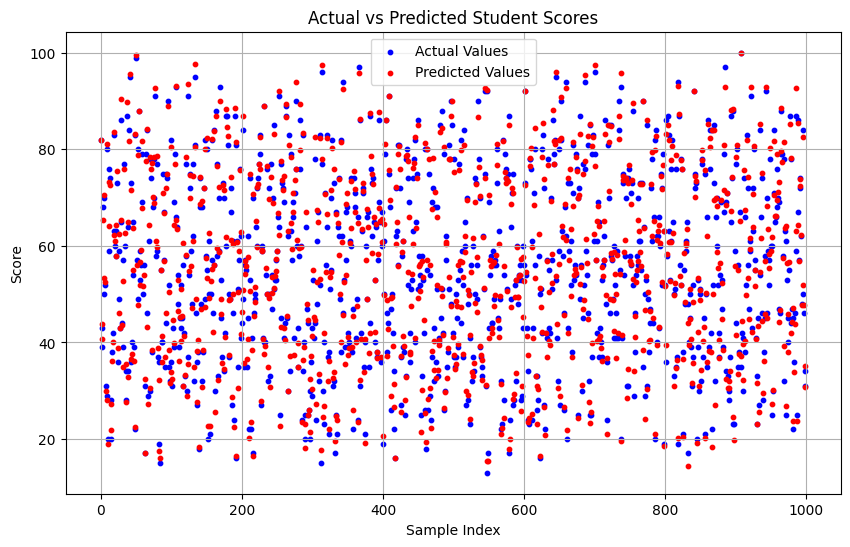

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue', s=10)
plt.scatter(range(len(predictions)), predictions, label='Predicted Values', color='red', s=10)
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.title('Actual vs Predicted Student Scores')
plt.legend()
plt.grid(True)
plt.show()


**Making the model better**

In [41]:
new_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=new_optimizer, loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=120, validation_data=(x_dev, y_dev))

Epoch 1/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.1367 - val_loss: 4.1997
Epoch 2/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9967 - val_loss: 4.2092
Epoch 3/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0925 - val_loss: 4.1922
Epoch 4/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1005 - val_loss: 4.1925
Epoch 5/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9335 - val_loss: 4.1820
Epoch 6/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0713 - val_loss: 4.2087
Epoch 7/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9725 - val_loss: 4.2085
Epoch 8/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9796 - val_loss: 4.1879
Epoch 9/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0756 - val_loss: 4.2092
Epoch 10/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0950 - val_loss: 4.1989
Epoch 11/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0512 - val_loss: 4.1960
Epoch 12/120
219/219 ━━━━━━━━━━━━━━━━━━━━

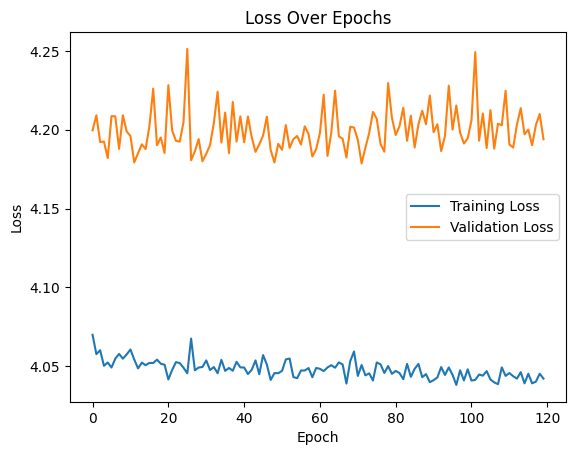

In [42]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0406
Test Loss: 4.190639972686768


at first the loss from test dataset was: 4.701

but after setting learning rate to 0.0001 and epochs to 120, the loss improved to: 4.216



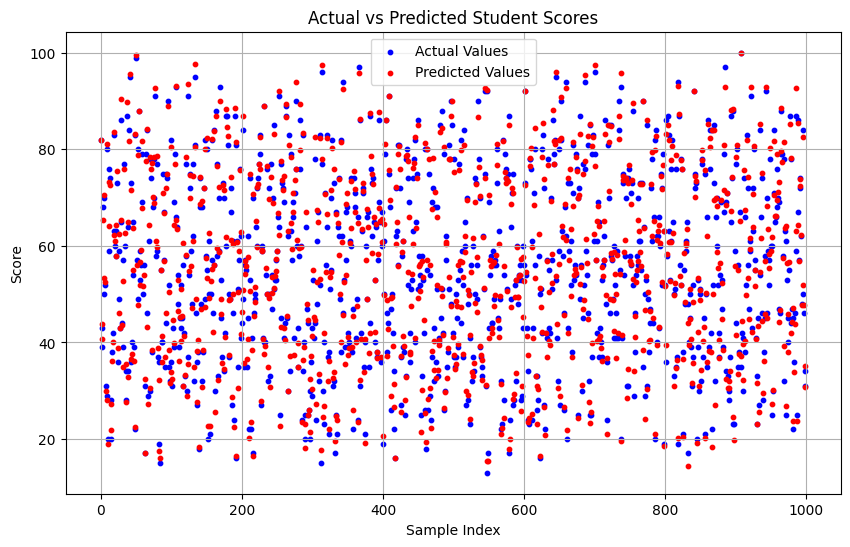

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue', s=10)
plt.scatter(range(len(predictions)), predictions, label='Predicted Values', color='red', s=10)
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.title('Actual vs Predicted Student Scores')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
predictions = model.predict(x_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Absolute Error: 1.632261745452881
R-squared: 0.9891740826871427
